# Airline Passenger Satisfaction 
- Final Presentation 
    - Maeve O'Toole and Lindsay Spratt

# About the Data...
BIG QUESTION: What factors lead a passenger to be satified with an airline?

About: This dataset contains an airline passenger satisfaction survey... what factors are highly correlated to a satisfied, or dissatisfied passenger? 

23 columns in the dataset... 

1. Gender: Gender of the passengers (Female, Male)

2. Customer Type: The customer type (Loyal customer, disloyal customer)

3. Age: The actual age of the passengers

4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

6. Flight distance: The flight distance of this journey

7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

9. Ease of Online booking: Satisfaction level of online booking

10. Gate location: Satisfaction level of Gate location

11. Food and drink: Satisfaction level of Food and drink

12. Online boarding: Satisfaction level of online boarding

13. Seat comfort: Satisfaction level of Seat comfort

14. Inflight entertainment: Satisfaction level of inflight entertainment

15. On-board service: Satisfaction level of On-board service

16. Leg room service: Satisfaction level of Leg room service

17. Baggage handling: Satisfaction level of baggage handling

18. Check-in service: Satisfaction level of Check-in service

19. Inflight service: Satisfaction level of inflight service

20. Cleanliness: Satisfaction level of Cleanliness

21. Departure Delay in Minutes: Minutes delayed when departure

22. Arrival Delay in Minutes: Minutes delayed when Arrival

23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.cluster import KMeans
import plotly.express as px
import plotly
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from mpl_toolkits import mplot3d
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from IPython.display import clear_output
from sklearn.cluster import Birch

/Users/lindsayspratt/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import and read the file
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download
    # this dataset on kaggle comes with test and train data

path = 'airline_test.csv'
data = pd.read_csv(path)

data.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [12]:
data.tail()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
25971                 5            4                           0   
25972                 5            4                           0   
25973                 4            2                           0   
25974                 5            4                           0   
25975                 1            1                           0   

       Arrival Delay in Minutes             satisfaction  
25971                       0.0  neutral or dissatisfied  
25972                       0.0                satisfied  
25973                       0.0  neutral or dissatisfied  
25974                       0.0                satisfied  
25975                       0.0  neutral or dissatisfied  

[5 rows x 25 columns]

In [13]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
len(data)

25976

In [15]:
data.shape

(25976, 25)

In [16]:
# what data types are we looking at...
    # integers - (19 columns)
    # objects - (5 columns)
    # floats - (1 column)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [17]:
# get the statistics on the integer columns...
data.describe()

Unnamed: 0             id           Age  Flight Distance  \
count  25976.000000   25976.000000  25976.000000     25976.000000   
mean   12987.500000   65005.657992     39.620958      1193.788459   
std     7498.769632   37611.526647     15.135685       998.683999   
min        0.000000      17.000000      7.000000        31.000000   
25%     6493.750000   32170.500000     27.000000       414.000000   
50%    12987.500000   65319.500000     40.000000       849.000000   
75%    19481.250000   97584.250000     51.000000      1744.000000   
max    25975.000000  129877.000000     85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count           25976.000000                       25976.000000   
mean                2.724746                           3.046812   
std                 1.335384                           1.533371   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count            25976.000000   25976.000000    25976.000000     25976.000000   
mean                 2.756775       2.977094        3.215353         3.261665   
std                  1.412951       1.282133        1.331506         1.355536   
min                  0.000000       1.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         4.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

       Seat comfort  Inflight entertainment  On-board service  \
count  25976.000000            25976.000000      25976.000000   
mean       3.449222                3.357753          3.385664   
std        1.320090                1.338299          1.282088   
min        1.000000                0.000000          0.000000   
25%        2.000000                2.000000          2.000000   
50%        4.000000                4.000000          4.000000   
75%        5.000000                4.000000          4.000000   
max        5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count      25976.000000      25976.000000     25976.000000      25976.000000   
mean           3.350169          3.633238         3.314175          3.649253   
std            1.318862          1.176525         1.269332          1.180681   
min            0.000000          1.000000         1.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  25976.000000                 25976.00000              25893.000000  
mean       3.286226                    14.30609                 14.740857  
std        1.319330                    37.42316                 37.517539  
min        0.000000                     0.00000                  0.000000  
25%        2.000000                     0.00000                  0.000000  
50%        3.000000                     0.00000                  0.000000  
75%        4.000000                    12.00000                 13.000000  
max        5.000000                  1128.00000               1115.000000

In [18]:
# can we explore more about the object columns
data.describe( include = 'object' )

Gender   Customer Type   Type of Travel     Class  \
count    25976           25976            25976     25976   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     13172           21177            18038     12495   

                   satisfaction  
count                     25976  
unique                        2  
top     neutral or dissatisfied  
freq                      14573

In [19]:
data.groupby('Customer Type').count()

Unnamed: 0     id  Gender    Age  Type of Travel  Class  \
Customer Type                                                                
Loyal Customer          21177  21177   21177  21177           21177  21177   
disloyal Customer        4799   4799    4799   4799            4799   4799   

                   Flight Distance  Inflight wifi service  \
Customer Type                                               
Loyal Customer               21177                  21177   
disloyal Customer             4799                   4799   

                   Departure/Arrival time convenient  Ease of Online booking  \
Customer Type                                                                  
Loyal Customer                                 21177                   21177   
disloyal Customer                               4799                    4799   

                   ...  Inflight entertainment  On-board service  \
Customer Type      ...                                             
Loyal Customer     ...                   21177             21177   
disloyal Customer  ...                    4799              4799   

                   Leg room service  Baggage handling  Checkin service  \
Customer Type                                                            
Loyal Customer                21177             21177            21177   
disloyal Customer              4799              4799             4799   

                   Inflight service  Cleanliness  Departure Delay in Minutes  \
Customer Type                                                                  
Loyal Customer                21177        21177                       21177   
disloyal Customer              4799         4799                        4799   

                   Arrival Delay in Minutes  satisfaction  
Customer Type                                              
Loyal Customer                        21111         21177  
disloyal Customer                      4782          4799  

[2 rows x 24 columns]

In [20]:
# group by the types of travel that a person specified 
data.groupby('Type of Travel').count()

Unnamed: 0     id  Gender  Customer Type    Age  Class  \
Type of Travel                                                            
Business travel       18038  18038   18038          18038  18038  18038   
Personal Travel        7938   7938    7938           7938   7938   7938   

                 Flight Distance  Inflight wifi service  \
Type of Travel                                            
Business travel            18038                  18038   
Personal Travel             7938                   7938   

                 Departure/Arrival time convenient  Ease of Online booking  \
Type of Travel                                                               
Business travel                              18038                   18038   
Personal Travel                               7938                    7938   

                 ...  Inflight entertainment  On-board service  \
Type of Travel   ...                                             
Business travel  ...                   18038             18038   
Personal Travel  ...                    7938              7938   

                 Leg room service  Baggage handling  Checkin service  \
Type of Travel                                                         
Business travel             18038             18038            18038   
Personal Travel              7938              7938             7938   

                 Inflight service  Cleanliness  Departure Delay in Minutes  \
Type of Travel                                                               
Business travel             18038        18038                       18038   
Personal Travel              7938         7938                        7938   

                 Arrival Delay in Minutes  satisfaction  
Type of Travel                                           
Business travel                     17980         18038  
Personal Travel                      7913          7938  

[2 rows x 24 columns]

In [21]:
# group by the class of the airline (business, economy, or economy plus)
data.groupby('Class').count()

Unnamed: 0     id  Gender  Customer Type    Age  Type of Travel  \
Class                                                                       
Business       12495  12495   12495          12495  12495           12495   
Eco            11564  11564   11564          11564  11564           11564   
Eco Plus        1917   1917    1917           1917   1917            1917   

          Flight Distance  Inflight wifi service  \
Class                                              
Business            12495                  12495   
Eco                 11564                  11564   
Eco Plus             1917                   1917   

          Departure/Arrival time convenient  Ease of Online booking  ...  \
Class                                                                ...   
Business                              12495                   12495  ...   
Eco                                   11564                   11564  ...   
Eco Plus                               1917                    1917  ...   

          Inflight entertainment  On-board service  Leg room service  \
Class                                                                  
Business                   12495             12495             12495   
Eco                        11564             11564             11564   
Eco Plus                    1917              1917              1917   

          Baggage handling  Checkin service  Inflight service  Cleanliness  \
Class                                                                        
Business             12495            12495             12495        12495   
Eco                  11564            11564             11564        11564   
Eco Plus              1917             1917              1917         1917   

          Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
Class                                                                         
Business                       12495                     12457         12495  
Eco                            11564                     11524         11564  
Eco Plus                        1917                      1912          1917  

[3 rows x 24 columns]

In [22]:
# need to change the loyal vs. disloyal data to numeric to visualize it 
    # just wanted to put this into numeric data for later 
numeric_customer_type = pd.get_dummies(data['Customer Type'])
numeric_customer_type.head()

Loyal Customer  disloyal Customer
0               1                  0
1               1                  0
2               0                  1
3               1                  0
4               1                  0

In [23]:
numeric_gender = pd.get_dummies(data["Gender"])
numeric_gender
# female = 1, male = 0

Female  Male
0           1     0
1           1     0
2           0     1
3           0     1
4           1     0
...       ...   ...
25971       0     1
25972       0     1
25973       1     0
25974       0     1
25975       1     0

[25976 rows x 2 columns]

In [382]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [267]:
data = pd.concat([data, pd.get_dummies(data['Customer Type'])], axis=1)
data.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Leg room service  Baggage handling  \
0                                  4  ...                 5                 5   
1                                  1  ...                 4                 4   
2                                  0  ...                 1                 3   
3                                  0  ...                 1                 1   
4                                  3  ...                 2                 2   

   Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  \
0                2                 5            5                          50   
1                3                 4            5                           0   
2                2                 2            2                           0   
3                3                 1            4                           0   
4                4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  Loyal Customer  \
0                      44.0                satisfied               1   
1                       0.0                satisfied               1   
2                       0.0  neutral or dissatisfied               0   
3                       6.0                satisfied               1   
4                      20.0                satisfied               1   

   disloyal Customer  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0  

[5 rows x 27 columns]

In [26]:
data = pd.concat([data, pd.get_dummies(data['Type of Travel'])], axis=1)
data.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Checkin service  Inflight service  \
0                                  4  ...                2                 5   
1                                  1  ...                3                 4   
2                                  0  ...                2                 2   
3                                  0  ...                3                 1   
4                                  3  ...                4                 2   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          50                      44.0   
1            5                           0                       0.0   
2            2                           0                       0.0   
3            4                           0                       6.0   
4            4                           0                      20.0   

              satisfaction  Loyal Customer  disloyal Customer  \
0                satisfied               1                  0   
1                satisfied               1                  0   
2  neutral or dissatisfied               0                  1   
3                satisfied               1                  0   
4                satisfied               1                  0   

   Business travel  Personal Travel  
0                1                0  
1                1                0  
2                1                0  
3                1                0  
4                1                0  

[5 rows x 29 columns]

In [282]:
data = pd.concat([data, pd.get_dummies(data['Class'])], axis=1)
data.head()
# realized that scaling/kmeans does not work for bool values... move on to different columns

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Arrival Delay in Minutes  \
0                                  4  ...                      44.0   
1                                  1  ...                       0.0   
2                                  0  ...                       0.0   
3                                  0  ...                       6.0   
4                                  3  ...                      20.0   

              satisfaction  Loyal Customer  disloyal Customer  Business  Eco  \
0                satisfied               1                  0         0    1   
1                satisfied               1                  0         1    0   
2  neutral or dissatisfied               0                  1         0    1   
3                satisfied               1                  0         1    0   
4                satisfied               1                  0         0    1   

   Eco Plus  Business  Eco  Eco Plus  
0         0         0    1         0  
1         0         1    0         0  
2         0         0    1         0  
3         0         1    0         0  
4         0         0    1         0  

[5 rows x 33 columns]

In [28]:
data["Target"] = 1
data.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Arrival Delay in Minutes  \
0                                  4  ...                      44.0   
1                                  1  ...                       0.0   
2                                  0  ...                       0.0   
3                                  0  ...                       6.0   
4                                  3  ...                      20.0   

              satisfaction  Loyal Customer  disloyal Customer  \
0                satisfied               1                  0   
1                satisfied               1                  0   
2  neutral or dissatisfied               0                  1   
3                satisfied               1                  0   
4                satisfied               1                  0   

   Business travel  Personal Travel  Business  Eco  Eco Plus  Target  
0                1                0         0    1         0       1  
1                1                0         1    0         0       1  
2                1                0         0    1         0       1  
3                1                0         1    0         0       1  
4                1                0         0    1         0       1  

[5 rows x 33 columns]

In [495]:
dataset = data.drop_duplicates()
dataset = dataset.dropna()
numeric_travel_type = {"Type of Travel": {"Business travel":1, "Personal Travel": 0}}
numeric_class_type = {"Class": {"Business": 2, "Eco Plus": 1, "Eco": 0}}
numeric_customer_type = {"Customer Type": {"Loyal Customer": 0, "disloyal Customer": 1}}
numeric_var_satisfaction = {"satisfaction": {"satisfied":1, "neutral or dissatisfied":0}}
# satisfied = 1, disatisfied - 0
dataset = dataset.replace(numeric_travel_type)
dataset = dataset.replace(numeric_class_type)
dataset = dataset.replace(numeric_customer_type)
dataset = dataset.replace(numeric_var_satisfaction)
numeric_data = dataset.select_dtypes( include = [np.number] )

In [497]:
numeric_data.head()

Unnamed: 0     id  Customer Type  Age  Type of Travel  Class  \
0           0  19556              0   52               1      0   
1           1  90035              0   36               1      2   
2           2  12360              1   20               1      0   
3           3  77959              0   44               1      2   
4           4  36875              0   49               1      0   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 5   
1                       3  ...                       4                 4   
2                       2  ...                       2                 4   
3                       0  ...                       1                 1   
4                       4  ...                       2                 2   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 5                 5                2                 5   
1                 4                 4                3                 4   
2                 1                 3                2                 2   
3                 1                 1                3                 1   
4                 2                 2                4                 2   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          50                      44.0   
1            5                           0                       0.0   
2            2                           0                       0.0   
3            4                           0                       6.0   
4            4                           0                      20.0   

   satisfaction  
0             1  
1             1  
2             0  
3             1  
4             1  

[5 rows x 24 columns]

In [383]:
# We decided to use all the satisfaction survey columns to accurately depict our clientele
satisfaction_cols = data[["Inflight wifi service","Departure/Arrival time convenient", "Ease of Online booking", "Gate location","Food and drink"
                          , "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service",
                         "Inflight service", "Cleanliness"]]
X = satisfaction_cols.values

In [384]:
X

array([[5, 4, 3, ..., 2, 5, 5],
       [1, 1, 3, ..., 3, 4, 5],
       [2, 0, 2, ..., 2, 2, 2],
       ...,
       [2, 5, 1, ..., 5, 4, 2],
       [3, 3, 3, ..., 4, 5, 4],
       [2, 5, 2, ..., 1, 1, 1]])

In [385]:
X = scale(X)


In [386]:
#2d PCA First
pca_2d = PCA(n_components = 2)
pca_2d.fit(X)

PCA(n_components=2)

In [387]:
variance_2d = pca_2d.explained_variance_ratio_
variance_2d

array([0.27414356, 0.18224228])

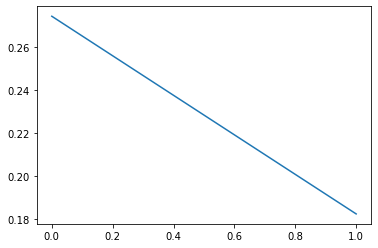

In [388]:
plt.plot(variance_2d)

In [389]:
scaler = StandardScaler()
scaler.fit(satisfaction_cols)
scaled_data = scaler.transform(satisfaction_cols)

In [390]:
x_pca_2d = pca_2d.transform(scaled_data)

In [391]:
# create a new Data Frame for the PCA components
x_pca_2d = pd.DataFrame(x_pca_2d)

# display the 3 PCA groups
x_pca_2d.columns = [ "PC1", "PC2"]
x_pca_2d.head()

PC1       PC2
0 -2.516420 -1.429939
1 -1.528604  2.469515
2  2.851352  0.525295
3  3.756859  3.542004
4  1.796939 -0.009324

In [392]:
x_pca_2d.shape

(25976, 2)

In [393]:
print(pca_2d.explained_variance_ratio_)

[0.27414356 0.18224228]


/Users/lindsayspratt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, hue, style. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



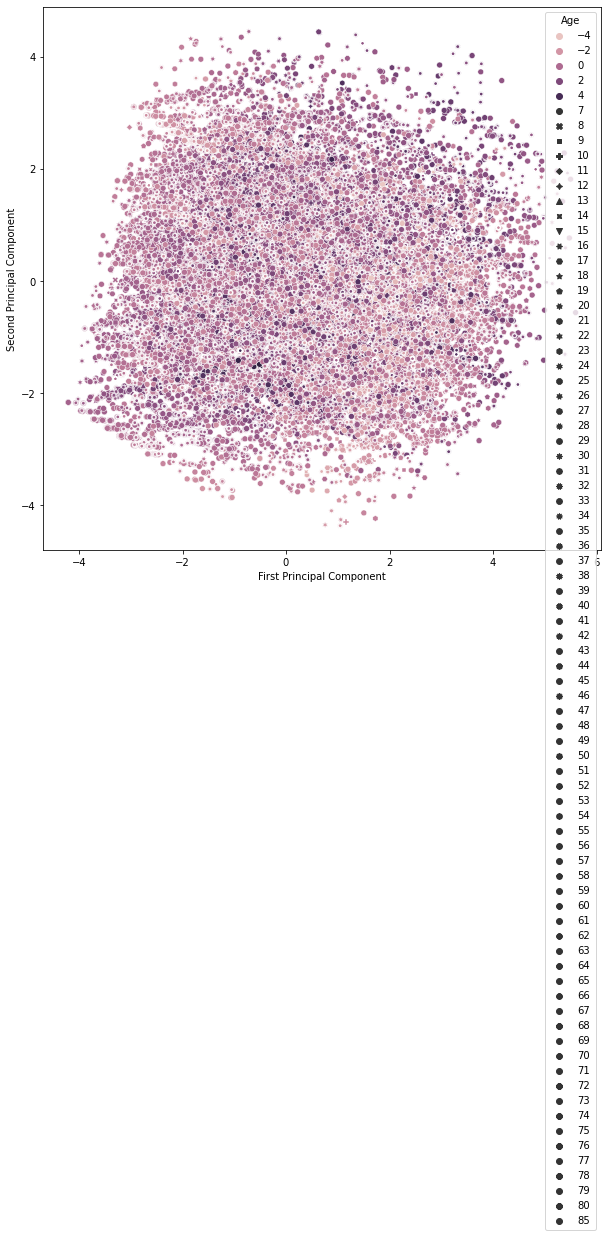

In [394]:
# display the PCA graph
    # in this case, we are only going to use the first 2 PCA components
    # this is for visualization purposes!
plt.figure(figsize = (10, 10))
# did it in range of 7 to 20, which are the values that explained around 61% of the data (These are the features
# we're interested in for customer satisfaction)
scatterplot(x_pca[:,0], x_pca[:,1], x_pca[:,2], data["Age"], cmap = "plasma", legend = True )
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

In [395]:
#silhouette graph on preprocessing notebook showed that we should use 3 components
pca = PCA(n_components = 3)
pca.fit(X)

PCA(n_components=3)

In [396]:
# The amount of variance that each PC explains
variance = pca.explained_variance_ratio_
variance

array([0.27414356, 0.18224228, 0.16342317])

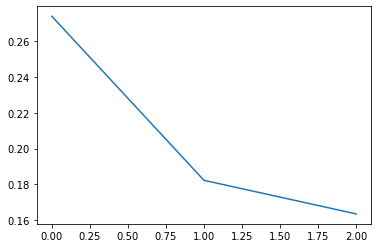

In [397]:
# plotting the variance
plt.plot(variance)
# principal component 1 explains the maximum variance, trends downward

In [398]:
from sklearn.preprocessing import StandardScaler

In [399]:
# Normalizing the data
scaler = StandardScaler()
scaler.fit(satisfaction_cols)
scaled_data = scaler.transform(satisfaction_cols)

In [400]:
x_pca = pca.transform(scaled_data)

In [401]:
scaled_data.shape

(25976, 13)

In [402]:
x_pca.shape

(25976, 3)

In [403]:
# create a new Data Frame for the PCA components
x_pca_3d = pd.DataFrame(x_pca)

# display the 3 PCA groups
x_pca_3d.columns = [ "PC1", "PC2", "PC3"]
x_pca_3d.head()

PC1       PC2       PC3
0 -2.516420 -1.429938 -0.657711
1 -1.528604  2.469516  0.145500
2  2.851352  0.525294 -0.089482
3  3.756858  3.542006  1.998875
4  1.796939 -0.009325  1.726807

In [404]:
print(pca.explained_variance_ratio_)
# this tells us the explained variance for each group
    # PCA1 explains 27% of the data
    # PCA2 explains 18% of the data
    # PCA3 explains 16% of the data
        # Together the 3 groups explain 61% of the data
            # tried 4 instead of 3 components
            # adding another PCA group did not improve the explained variance

[0.27414356 0.18224228 0.16342317]


In [405]:
# cummulative sum for the explained variance ~ 62%
print(pca.explained_variance_ratio_.cumsum())

[0.27414356 0.45638585 0.61980901]


In [406]:
fig = px.scatter_3d(x_pca, x=0,y=1,z=2,
                   color = data["Age"], 
                    labels = data["Age"])

fig.update_traces(marker_size = 3)
fig.show()

In [489]:
dataset = data.drop_duplicates()
dataset = dataset.dropna()
numeric_travel_type = {"Type of Travel": {"Business travel":1, "Personal Travel": 0}}
numeric_class_type = {"Class": {"Business": 2, "Eco Plus": 1, "Eco": 0}}
numeric_customer_type = {"Customer Type": {"disloyal": 0, "loyal": 1}}
numeric_var_satisfaction = {"satisfaction": {"satisfied":1, "neutral or dissatisfied":0}}
# satisfied = 1, disatisfied - 0
dataset = dataset.replace(numeric_travel_type)
dataset = dataset.replace(numeric_class_type)
dataset = dataset.replace(numeric_customer_type)
dataset = dataset.replace(numeric_var_satisfaction)
numeric_data = dataset.select_dtypes( include = [np.number] )

In [492]:
numeric_data.columns

Index(['Unnamed: 0', 'id', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [409]:
# TSNE
tsne = TSNE(2)
tsne_result = tsne.fit_transform(numeric_data)

/Users/lindsayspratt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



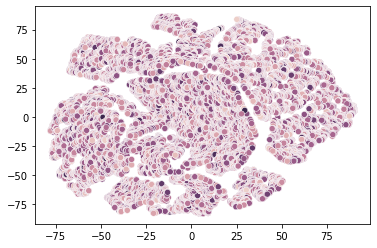

In [410]:
sns.scatterplot(tsne_result[:, 0], tsne_result[:, 1], hue = dataset.Age, legend = False)
plt.show()

In [159]:
tsne_3d = TSNE( n_components = 3, random_state = 0 )
tsne_3d = tsne.fit_transform(numeric_data)

In [417]:
fig = px.scatter_3d( tsne_3d, x = 0, y = 1, color = dataset.Age, labels = dataset.Age )
fig = px.update_traces( marker_size = 8 )
fig.show()

AttributeError: module 'plotly.express' has no attribute 'update_traces'

In [411]:
conda install -c conda-forge umap-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [419]:
# UMAP to visualize and separate data in a stochastic/random way
reducer = UMAP()

In [420]:
umap_result = reducer.fit_transform(numeric_data)

In [421]:
km = KMeans(n_clusters = 3)
km.fit_predict(umap_result)
umap_cluster = km.fit_predict(umap_result)

In [422]:
umap_data = pd.DataFrame(umap_result)

In [426]:
# get the centroids
# the dimensions with the highest variance are most important in distinguishing the clusters
centroids = km.cluster_centers_
u_labels = np.unique(umap_cluster)

AttributeError: 'UMAP' object has no attribute 'get_feature_names_out'

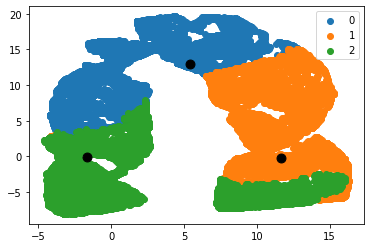

In [202]:
# plot this
tclusters = km.fit_predict(tsne_result)
for i in u_labels:
    plt.scatter(umap_data.iloc[tclusters == i, 0], umap_data.iloc[tclusters == i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:, 1], s = 80, color = 'k' )
plt.legend()
plt.show()

In [360]:
# Moving on to KMeans
le = sklearn.preprocessing.LabelEncoder()

In [433]:
le.fit(numeric_data['Age'])
print(list(le.classes_))
numeric_data["Age"] = le.transform(numeric_data["Age"])

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 85]


/var/folders/wx/h6xs183s7klgpmp9jmxtv20w0000gn/T/ipykernel_4891/2572049662.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [470]:
X = numeric_data[["Inflight wifi service","Departure/Arrival time convenient", "Ease of Online booking", "Gate location","Food and drink"
                          , "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service",
                         "Inflight service", "Cleanliness", "Flight Distance", "Departure Delay in Minutes","Arrival Delay in Minutes", "satisfaction", "Food and drink", "Age"]]

In [471]:
X = X.dropna()

In [472]:
g_matrix = pd.DataFrame.to_numpy(X)

In [473]:
cluster_model = KMeans(n_clusters = 3, random_state = 10)

In [474]:
cluster_model.fit(g_matrix)

KMeans(n_clusters=3, random_state=10)

In [475]:
cluster_model.labels_

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [476]:
#creating predicted cluster labels
cluster_labels = cluster_model.fit_predict(g_matrix)

In [477]:
n = numeric_data

In [478]:
# adding predicted values to the dataframe
n["Predicted Values"] = cluster_labels

/var/folders/wx/h6xs183s7klgpmp9jmxtv20w0000gn/T/ipykernel_4891/1642028086.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [479]:
n.head()

Unnamed: 0     id  Age  Flight Distance  Inflight wifi service  \
0           0  19556   52              160                      5   
1           1  90035   36             2863                      1   
2           2  12360   20              192                      2   
3           3  77959   44             3377                      0   
4           4  36875   49             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   

   Food and drink  Online boarding  ...  On-board service  Leg room service  \
0               3                4  ...                 5                 5   
1               5                4  ...                 4                 4   
2               2                2  ...                 4                 1   
3               3                4  ...                 1                 1   
4               4                1  ...                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                          50                      44.0             1   
1                           0                       0.0             1   
2                           0                       0.0             0   
3                           0                       6.0             1   
4                           0                      20.0             1   

   Predicted Values  
0                 0  
1                 2  
2                 0  
3                 2  
4                 1  

[5 rows x 22 columns]

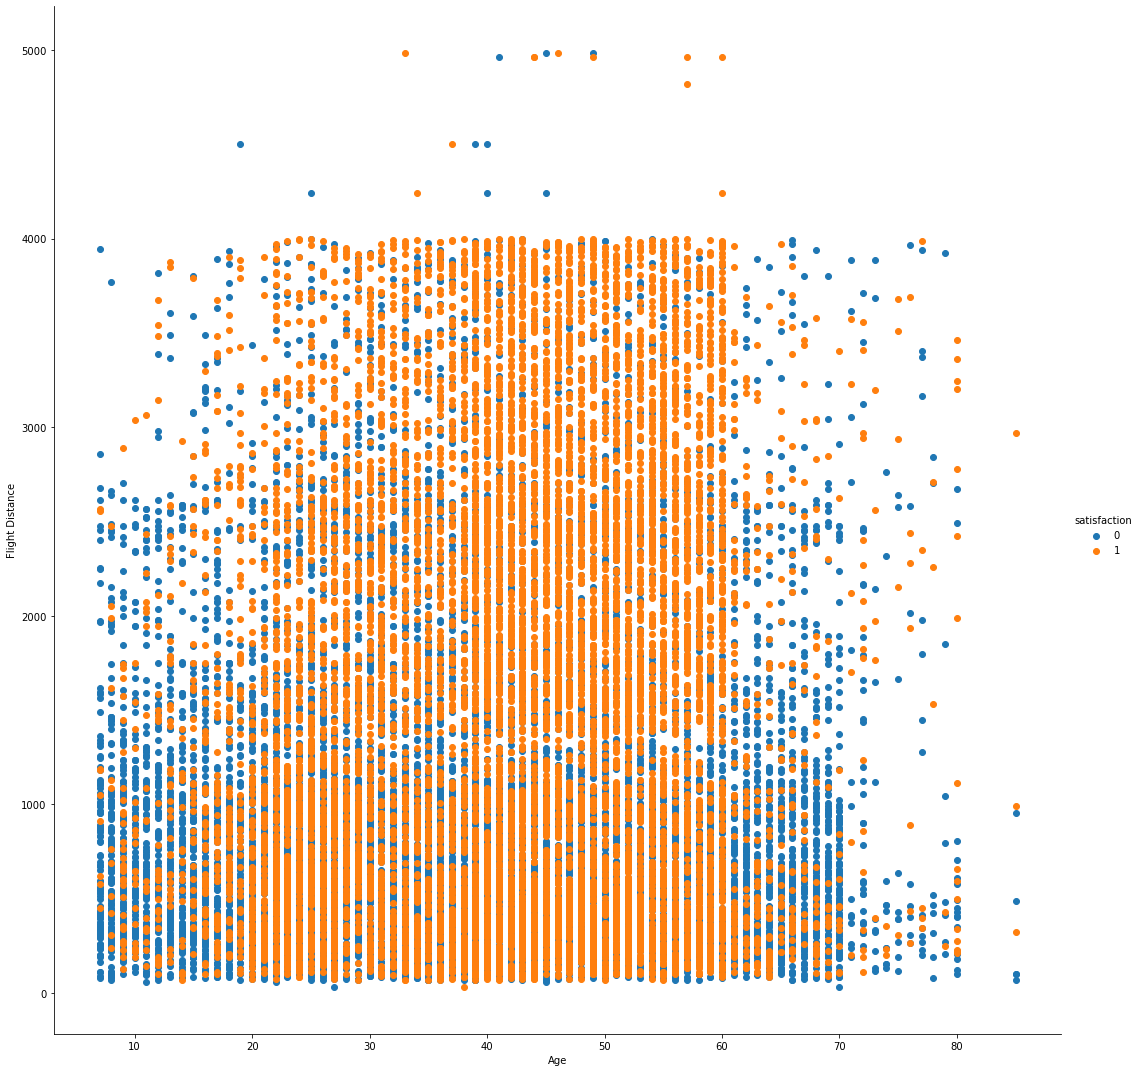

In [480]:
sns.FacetGrid(n, hue = "satisfaction", height = 15).map(plt.scatter,
       "Age", "Flight Distance").add_legend()
# this shows us that as the age is older (55+) and the age is younger (15 and below), travelers become more dissatisfied
# more frequently 
    # this is surprising as our eda shows the majority of the travelers were in the middle of this range (25 - 45)
    # SO, less frequent travelers, espeically in these age categories, are more suseptible to being unhappy with their
    # travel exerience and therefore, airlines should be more focused on making these people more satisfied 
        # our eda also shows that these two age groups (younger and older) are more likely to travel for personal reasons
        # while the middle range travel more for business purposes 

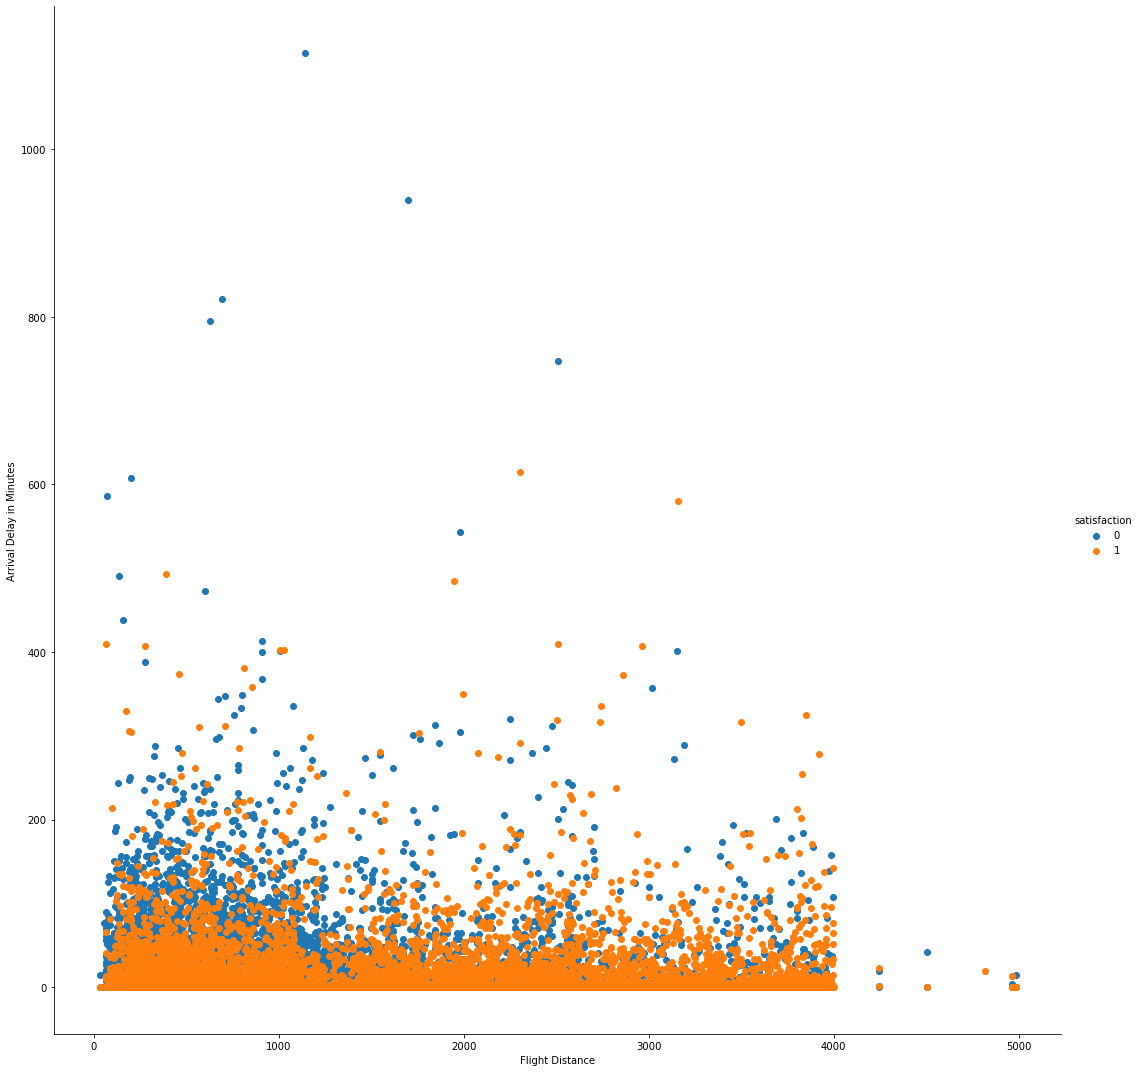

In [481]:
sns.FacetGrid(n, hue = "satisfaction", height = 15).map(plt.scatter,
         "Flight Distance", "Arrival Delay in Minutes").add_legend()

In [482]:
centroids

0       1
Inflight wifi service                5.0     3.0
Departure/Arrival time convenient    3.0     4.0
Ease of Online booking               2.0     5.0
Gate location                        4.0     1.0
Food and drink                       1.0     3.0
Seat comfort                         3.0     4.0
Inflight entertainment               1.0     3.0
On-board service                     1.0     4.0
Leg room service                     4.0     2.0
Baggage handling                     4.0     2.0
Checkin service                      4.0     5.0
Inflight service                     5.0     4.0
Cleanliness                          1.0     2.0
Flight Distance                    925.0  1342.0
Departure Delay in Minutes           0.0     5.0
Arrival Delay in Minutes             0.0     0.0
satisfaction                         0.0     0.0
Food and drink                       5.0     4.0

In [483]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis =1)

In [498]:
centroids = random_centroids(numeric_data, 2)

In [499]:
centroids

0        1
Unnamed: 0                          18644.0   1619.0
id                                 125235.0  23622.0
Customer Type                           0.0      0.0
Age                                    36.0     20.0
Type of Travel                          0.0      0.0
Class                                   0.0      2.0
Flight Distance                      3178.0   1009.0
Inflight wifi service                   4.0      4.0
Departure/Arrival time convenient       4.0      1.0
Ease of Online booking                  3.0      5.0
Gate location                           3.0      5.0
Food and drink                          5.0      4.0
Online boarding                         4.0      5.0
Seat comfort                            2.0      3.0
Inflight entertainment                  4.0      1.0
On-board service                        1.0      2.0
Leg room service                        1.0      4.0
Baggage handling                        5.0      1.0
Checkin service                         3.0      1.0
Inflight service                        4.0      4.0
Cleanliness                             1.0      3.0
Departure Delay in Minutes             11.0     16.0
Arrival Delay in Minutes               28.0      0.0
satisfaction                            1.0      0.0